## C2. Plot and save all cloud masks

In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns

# EOLearn libraries:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, LoadTask, SaveTask, FeatureType, EOExecutor
from eolearn.core import OverwritePermission

# Add to python path parent dictionary
import sys
sys.path.append("../../")

# load site dependant constants (HERE YOU CAN CHOOSE DIFFERENT LOCATION)
from aoi_sites import upe_promice_area as site

# load utility functions
from utils import io_functions as io_utils
from utils import plot_functions as plot_utils

### 0. Choose patch to analyze

In [2]:
eo_patch_no = 4

if eo_patch_no == 0:
    
    #  didn't evaluated for clouds
    CHOSEN_DATE_RANGE = site.DATE_RANGES_LANDSAT_8[6]
    DATETIME_ID = 10
    EO_PATCH_NAME = '3176_maxcc_0.05_x-5_y-134'
    
elif eo_patch_no == 1:
    
    # 1.  didn't evaluated for clouds
    CHOSEN_DATE_RANGE = site.DATE_RANGES_LANDSAT_8[1]
    DATETIME_ID = 2
    EO_PATCH_NAME = '2969_maxcc_0.05_x-3_y-130'
    
elif eo_patch_no == 2:
    
    # 2.  didn't evaluated for clouds
    CHOSEN_DATE_RANGE = site.DATE_RANGES_LANDSAT_8[0]
    DATETIME_ID = 1
    EO_PATCH_NAME = '2969_maxcc_0.05_x-3_y-130'
    
elif eo_patch_no == 3:
        
    # 3. didn't evaluated for clouds
    CHOSEN_DATE_RANGE = site.DATE_RANGES_LANDSAT_8[6]
    DATETIME_ID = 6
    EO_PATCH_NAME = '2969_maxcc_0.05_x-3_y-130'
    
elif eo_patch_no == 4:
    # 4. half compact clouds/ half free
    CHOSEN_DATE_RANGE = site.DATE_RANGES_LANDSAT_8[0]
    DATETIME_ID = 0
    EO_PATCH_NAME = '2969_maxcc_0.05_x-3_y-130'        
    
else : print('No such an index!')

### 0. Set cloud data to display

In [3]:
# False:only display True: save and display 
SAVE = True
PLOT_FOLDER = './plots/cloud_mask_comparison/'

LIST_OF_RGB_DATA_TO_PLOT = [ 'LANDSAT_RAW_BANDS' ]

LIST_OF_ONE_BAND_DATA_TO_PLOT = [ 'LANDSAT_RAW_BANDS' ]

# to plot different cloud masks
LIST_OF_ONE_BAND_MASKS_TO_PLOT = ['CLOUD_MASK_SWIR-1_090','CLOUD_MASK_SWIR-1_100',
                         'CLOUD_MASK_SWIR-1_150','CLOUD_MASK_SWIR-1_200',
                         'CLOUD_MASK_SWIR-1_300']
# to plot all 100 cloud masks
LIST_OF_ONE_BAND_MASKS_TO_PLOT_100 = ['CLOUD_MASK_SWIR-1_100','CLOUD_MASK_SWIR-1_100_dil_6_str1',
                                      'CLOUD_MASK_SWIR-1_100_dil_6_str2']
# to plot all 150 cloud masks
LIST_OF_ONE_BAND_MASKS_TO_PLOT_150 = ['CLOUD_MASK_SWIR-1_150','CLOUD_MASK_SWIR-1_150_dil_6_str1',
                                      'CLOUD_MASK_SWIR-1_150_dil_6_str2']
# to plot all 200 cloud masks
LIST_OF_ONE_BAND_MASKS_TO_PLOT_200 = ['CLOUD_MASK_SWIR-1_200','CLOUD_MASK_SWIR-1_200_dil_6_str1',
                                      'CLOUD_MASK_SWIR-1_200_dil_6_str2']

# to plot all 300 cloud masks
LIST_OF_ONE_BAND_MASKS_TO_PLOT_300 = ['CLOUD_MASK_SWIR-1_300','CLOUD_MASK_SWIR-1_300_dil_6_str1',
                                      'CLOUD_MASK_SWIR-1_300_dil_6_str2', 'CLOUD_MASK_SWIR-1_300_dil_6_str2',
                                     'CLOUD_MASK_SWIR-1_300_dil_10_str2']


PATCH_FILEPATH = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], CHOSEN_DATE_RANGE)
PATCH_FILEPATH

'../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/'

### 1. Load eo_patch

In [4]:
eo_patch = EOPatch.load(PATCH_FILEPATH+EO_PATCH_NAME)
eo_patch

EOPatch(
  data: {
    LANDSAT_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_GREEN_NIR: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_ICE: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_1: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_2: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    LANDSAT_QA_LAYERS: numpy.ndarray(shape=(7, 333, 333, 5), dtype=float32)
    LANDSAT_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(7, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS_DAY_0: numpy.ndarray(shape=(7, 333, 333, 7), dtype=float32)
    MODIS_RAW_BANDS_DAY_AFTER: numpy.ndarray(shape=(

### 2. PLot images from the lists

2013-05-25 15:26:35
Ploting...
Saved: 2969_2013_0_LANDSAT_RAW_BANDS.png


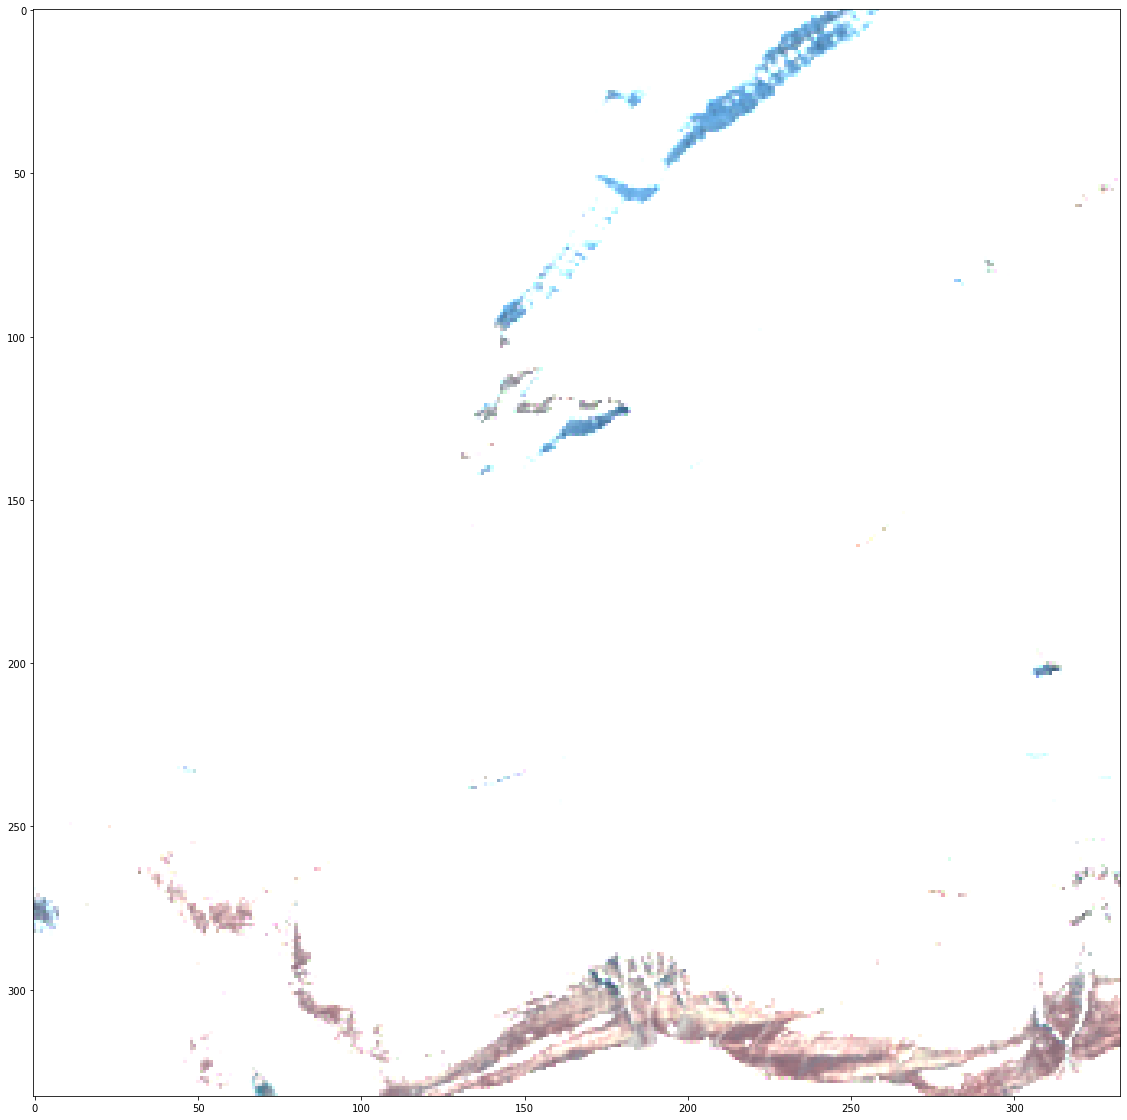

In [6]:
#Plotting GRB picture with clouds
#DATETIME_ID = 2
for data_acces_name in LIST_OF_RGB_DATA_TO_PLOT:
    plot_utils.plot_RGB_LANDSAT_8_image(eo_patch, data_acces_name=data_acces_name, datetime_idx=DATETIME_ID, save=SAVE, plot_folder = PLOT_FOLDER)

2013-05-25 15:26:35
Saved: 2969_2013_0_LANDSAT_RAW_BANDS.png


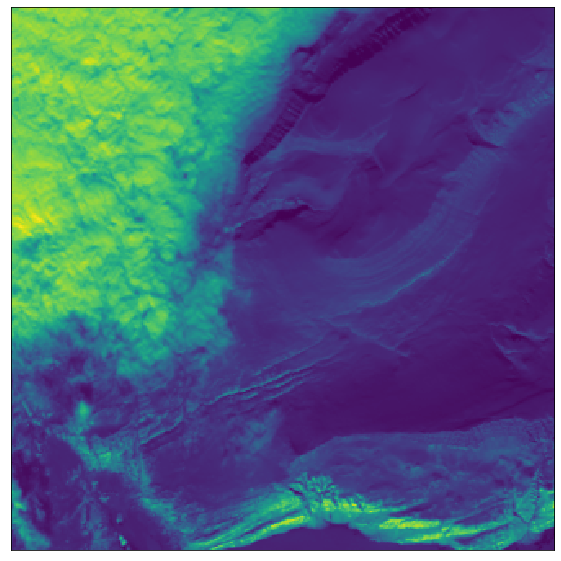

In [7]:
#Plotting SWIR band of a cloudy picture
for data_acces_name in LIST_OF_ONE_BAND_DATA_TO_PLOT:
    plot_utils.plot_single_band_LANDSAT_8(eo_patch, band_idx = 6, data_acces_name=data_acces_name, datetime_idx=DATETIME_ID, save=SAVE, plot_folder = PLOT_FOLDER)

2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_090.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_100.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_150.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_200.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_300.png


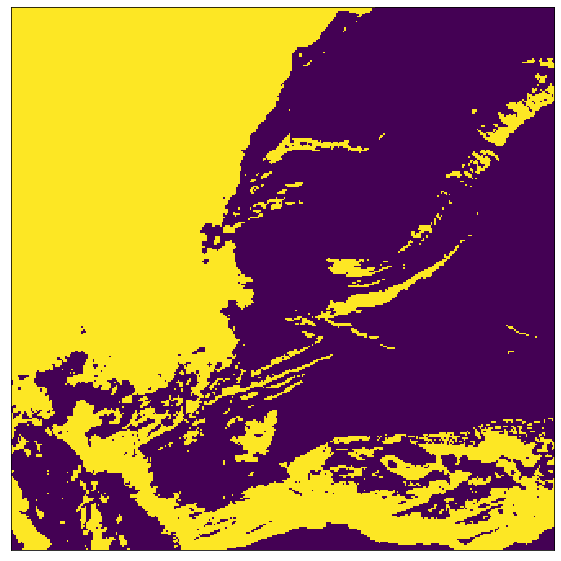

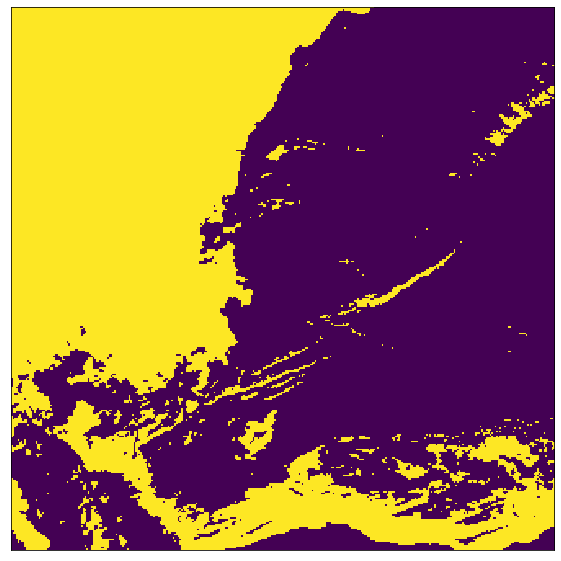

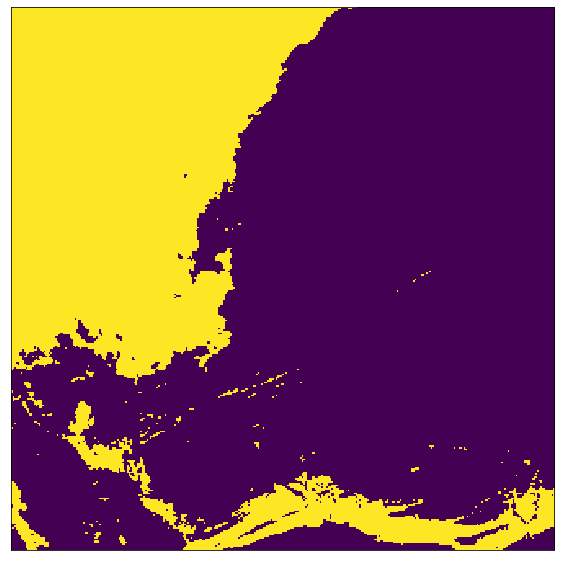

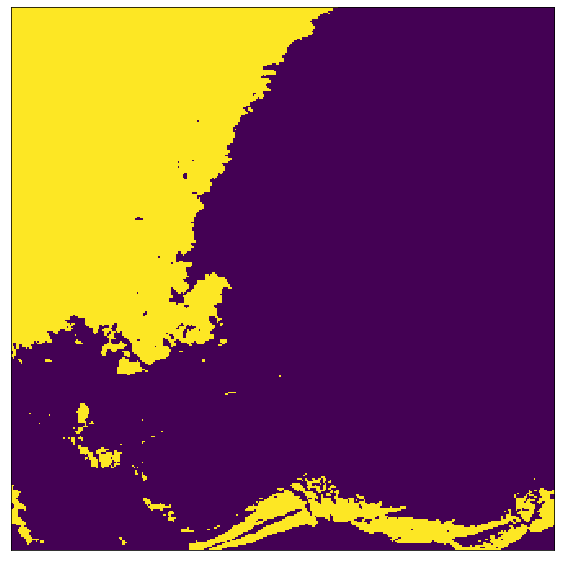

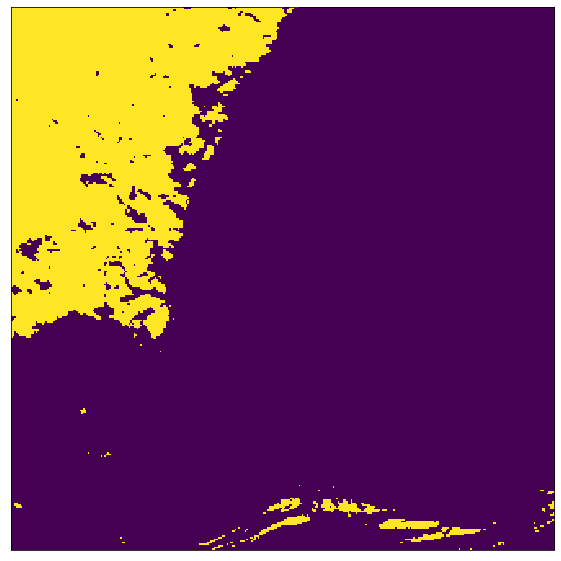

In [8]:
#Plotting different simple threshold clouds mask produced from SWIR bandfor sanity check:
for data_acces_name in LIST_OF_ONE_BAND_MASKS_TO_PLOT:
    plot_utils.plot_single_mask_LANDSAT_8(eo_patch, band_idx = 0, data_acces_name=data_acces_name, datetime_idx=DATETIME_ID, save=SAVE, plot_folder = PLOT_FOLDER)

#### It looks like 0.100 threshold if totally fine to accept, but it has to be dialated by 200m (6 times ) as suggested in the paper: Dual-satellite (Sentinel-2 and Landsat 8) remote sensing of supraglacial lakes in Greenland 

prinf dialated pictures

2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_100.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_100_dil_6_str1.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_100_dil_6_str2.png


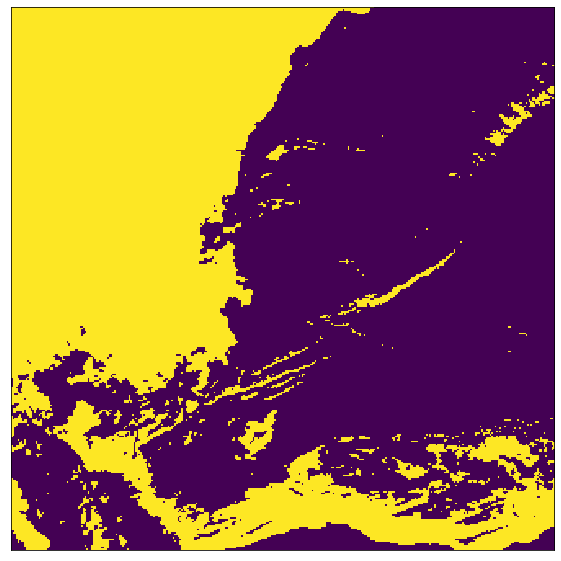

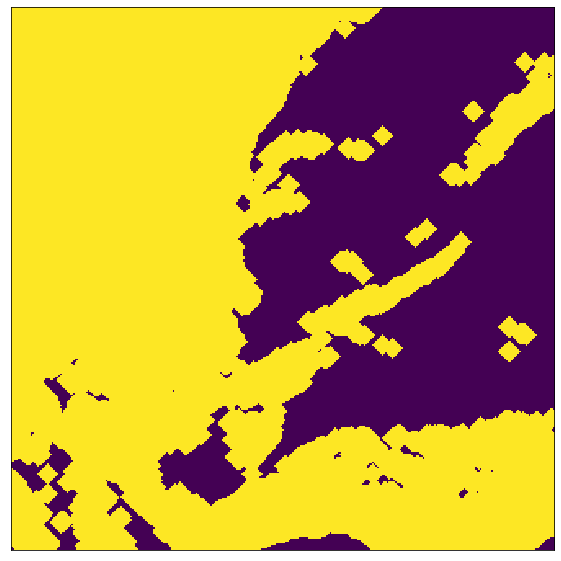

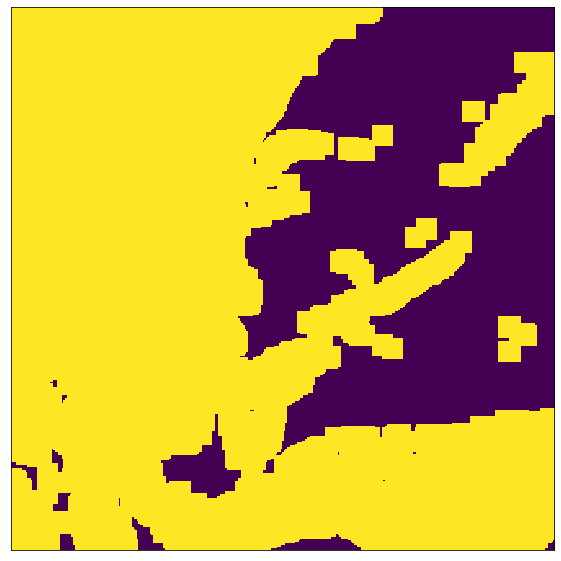

In [9]:
#Plotting different simple threshold clouds mask produced from SWIR bandfor sanity check:
for data_acces_name in LIST_OF_ONE_BAND_MASKS_TO_PLOT_100:
    plot_utils.plot_single_mask_LANDSAT_8(eo_patch, band_idx = 0, data_acces_name=data_acces_name, datetime_idx=DATETIME_ID, save=SAVE, plot_folder = PLOT_FOLDER)

2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_150.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_150_dil_6_str1.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_150_dil_6_str2.png


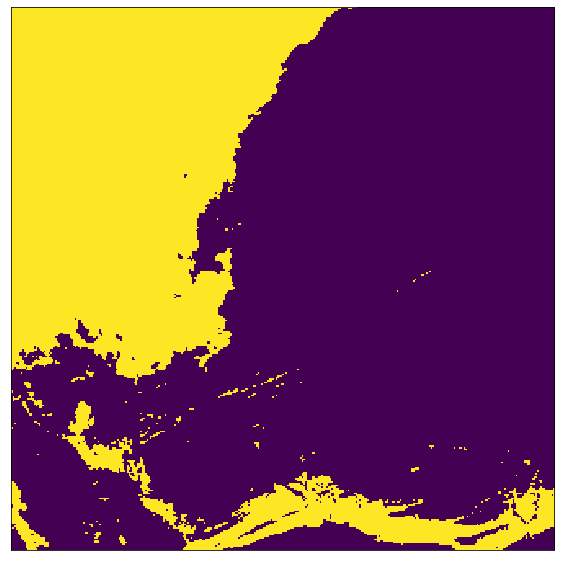

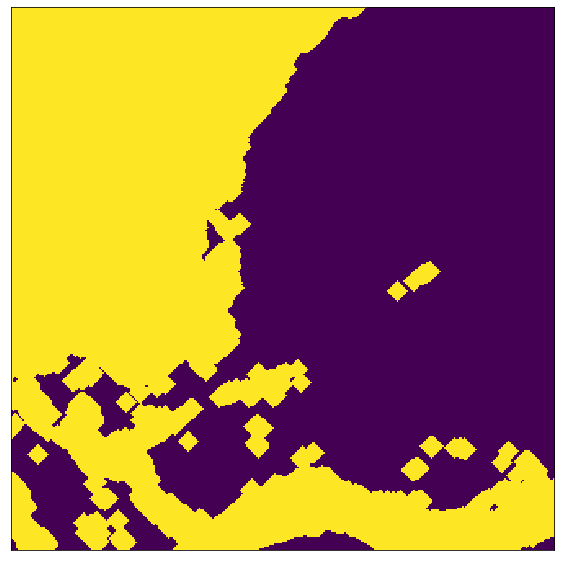

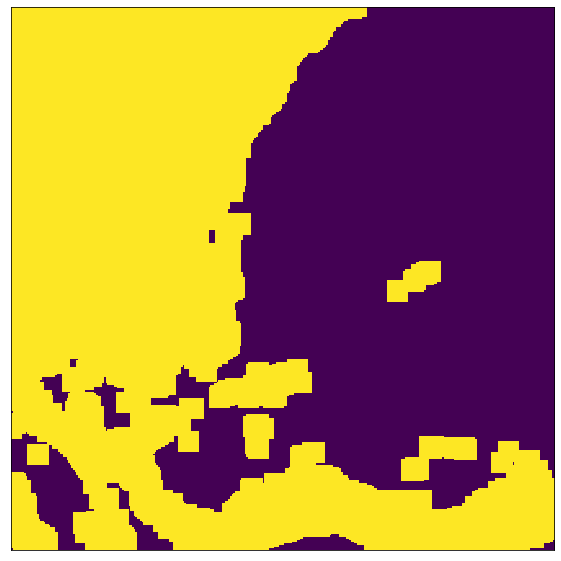

In [10]:
#Plotting different simple threshold clouds mask produced from SWIR bandfor sanity check:
for data_acces_name in LIST_OF_ONE_BAND_MASKS_TO_PLOT_150:
    plot_utils.plot_single_mask_LANDSAT_8(eo_patch, band_idx = 0, data_acces_name=data_acces_name, datetime_idx=DATETIME_ID, save=SAVE, plot_folder = PLOT_FOLDER)

2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_200.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_200_dil_6_str1.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_200_dil_6_str2.png


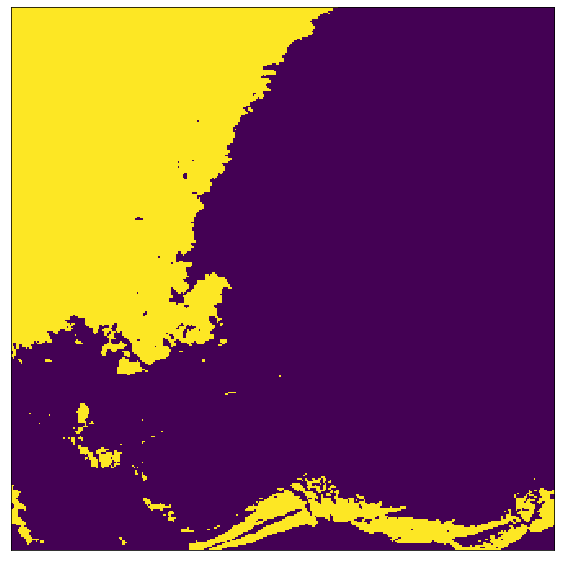

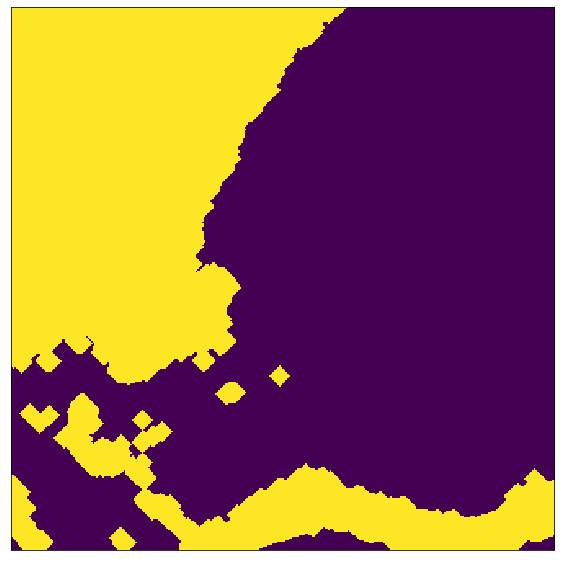

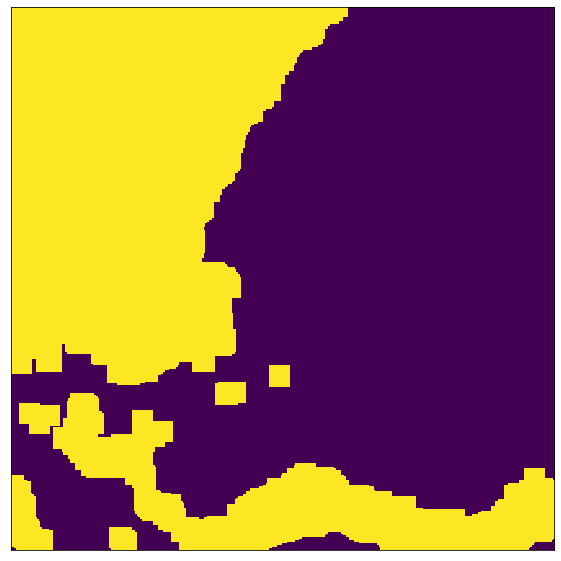

In [11]:
#Plotting different simple threshold clouds mask produced from SWIR bandfor sanity check:
for data_acces_name in LIST_OF_ONE_BAND_MASKS_TO_PLOT_200:
    plot_utils.plot_single_mask_LANDSAT_8(eo_patch, band_idx = 0, data_acces_name=data_acces_name, datetime_idx=DATETIME_ID, save=SAVE, plot_folder = PLOT_FOLDER)

2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_300.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_300_dil_6_str1.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_300_dil_6_str2.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_300_dil_6_str2.png
2013-05-25 15:26:35
Saved: 2969_2013_0_CLOUD_MASK_SWIR-1_300_dil_10_str2.png


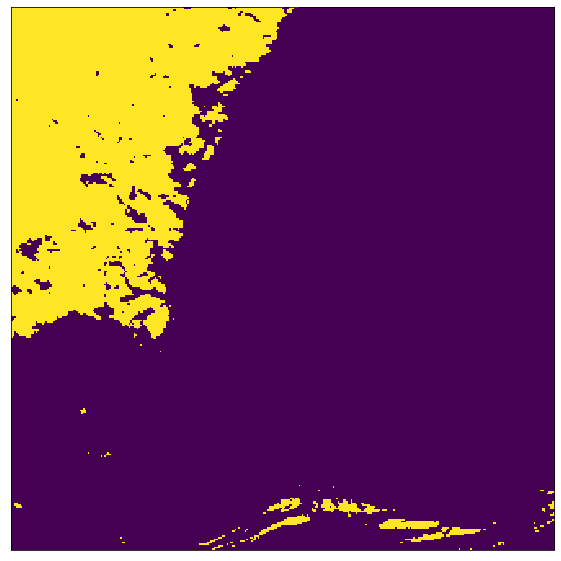

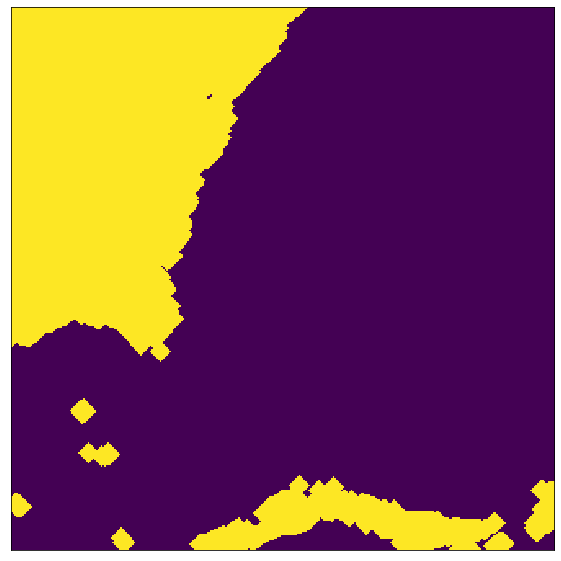

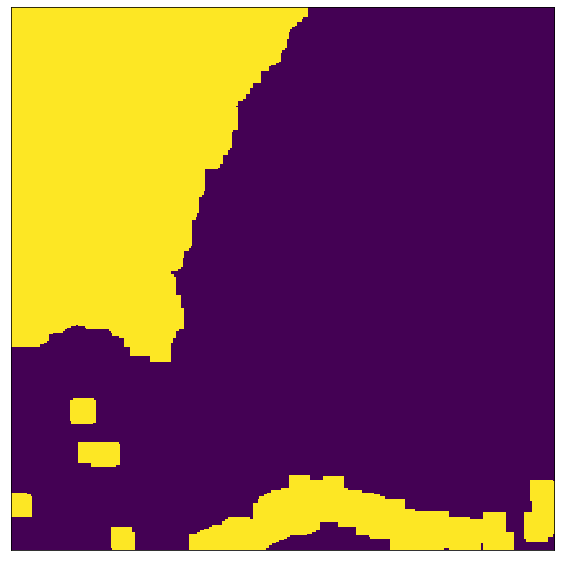

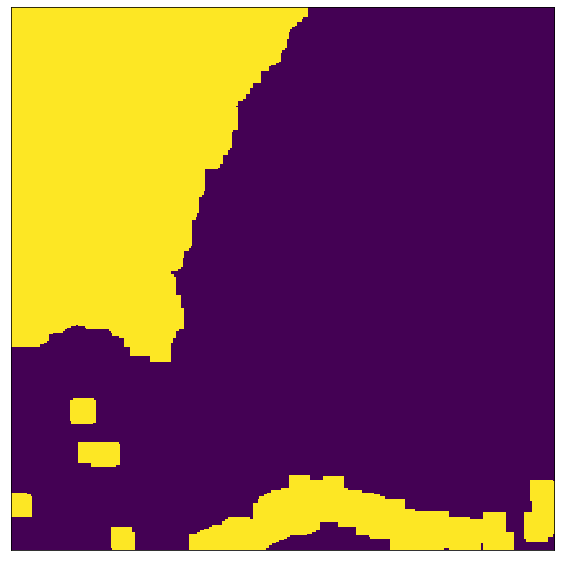

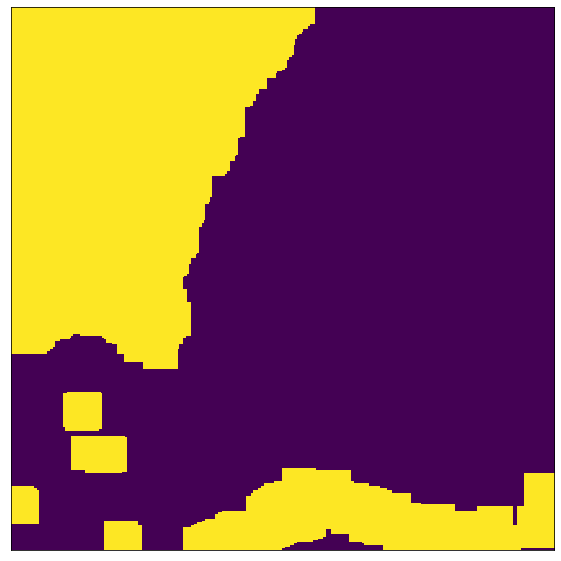

In [12]:
#Plotting different simple threshold clouds mask produced from SWIR bandfor sanity check:
for data_acces_name in LIST_OF_ONE_BAND_MASKS_TO_PLOT_300:
    plot_utils.plot_single_mask_LANDSAT_8(eo_patch, band_idx = 0, data_acces_name=data_acces_name, datetime_idx=DATETIME_ID, save=SAVE, plot_folder = PLOT_FOLDER)